1) DataPreparation_Outlier_Treatment

In [1]:
# 1.	Prepare the dataset by performing the preprocessing techniques, to treat the outliers. Refer to the Boston.csv file.
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

bt = pd.read_csv("C:/Users/RamyaRajaLakshmi/Documents/My_Learning/EDA (Exploratory Data Analytics)/Data Preprocessing/InClass_DataPreprocessing_datasets/Boston.csv")
bt.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [2]:
# convert the float datatype which has discrete values into discrete datatype
bt[['zn', 'age', 'chas', 'rad', 'tax']] = bt[['zn', 'age', 'chas', 'rad', 'tax']].astype('int64')
bt.dtypes

crim       float64
zn           int64
indus      float64
chas         int64
nox        float64
rm         float64
age          int64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

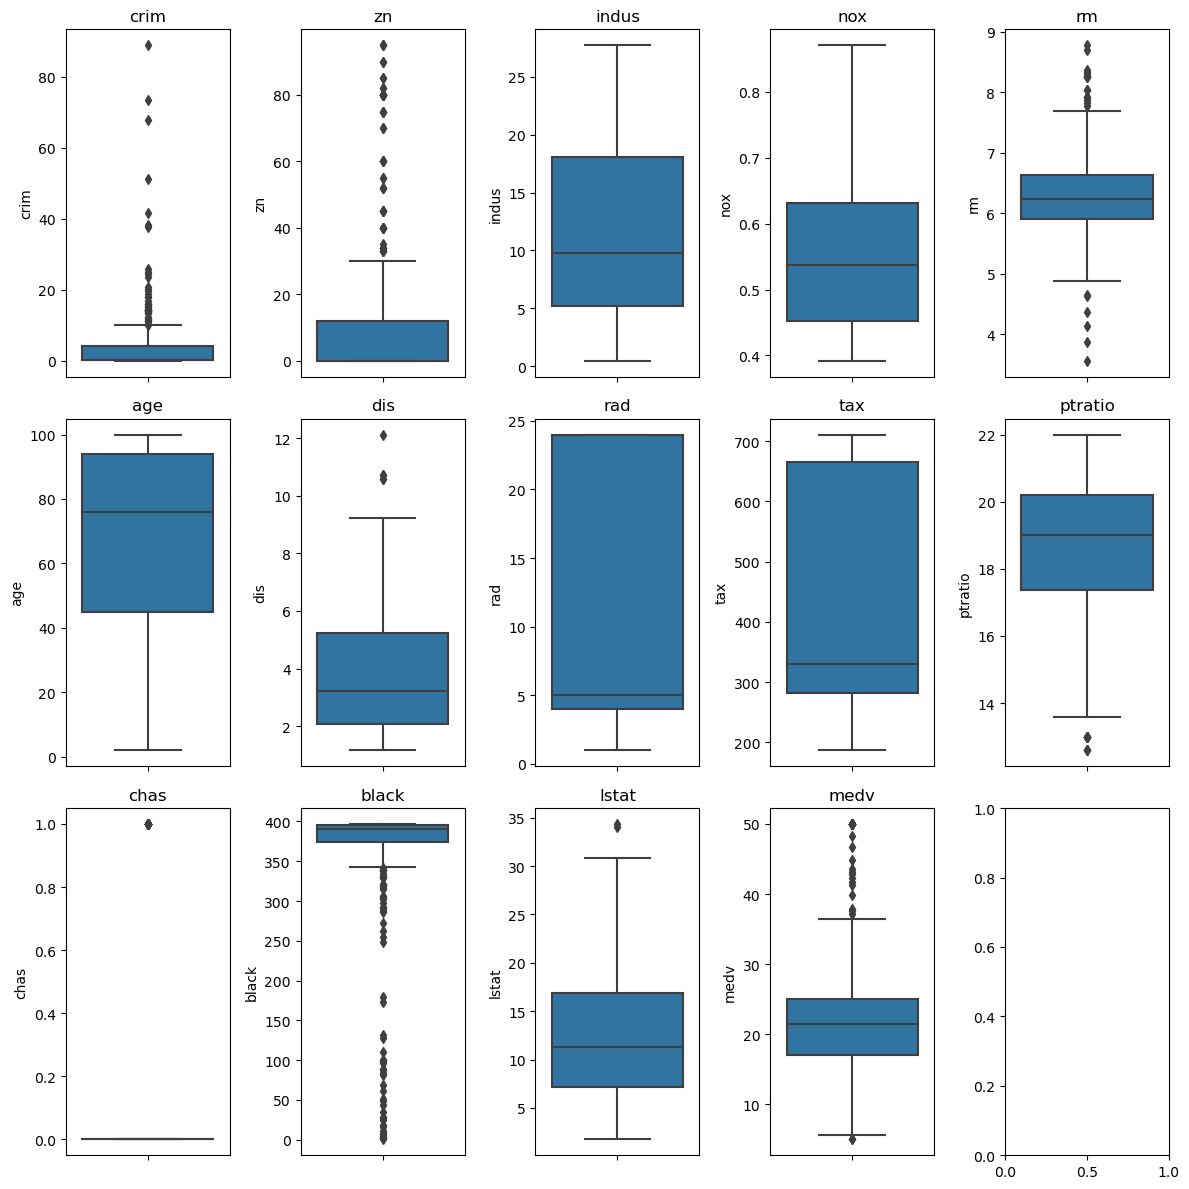

In [3]:
column = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'chas', 'black', 'lstat', 'medv']
fig, ax = plt.subplots(nrows = 3, ncols = 5, figsize = (12,12))
ax = ax.flatten()

for i, col in enumerate(column):
    sns.boxplot(y = bt[col], ax = ax[i])
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

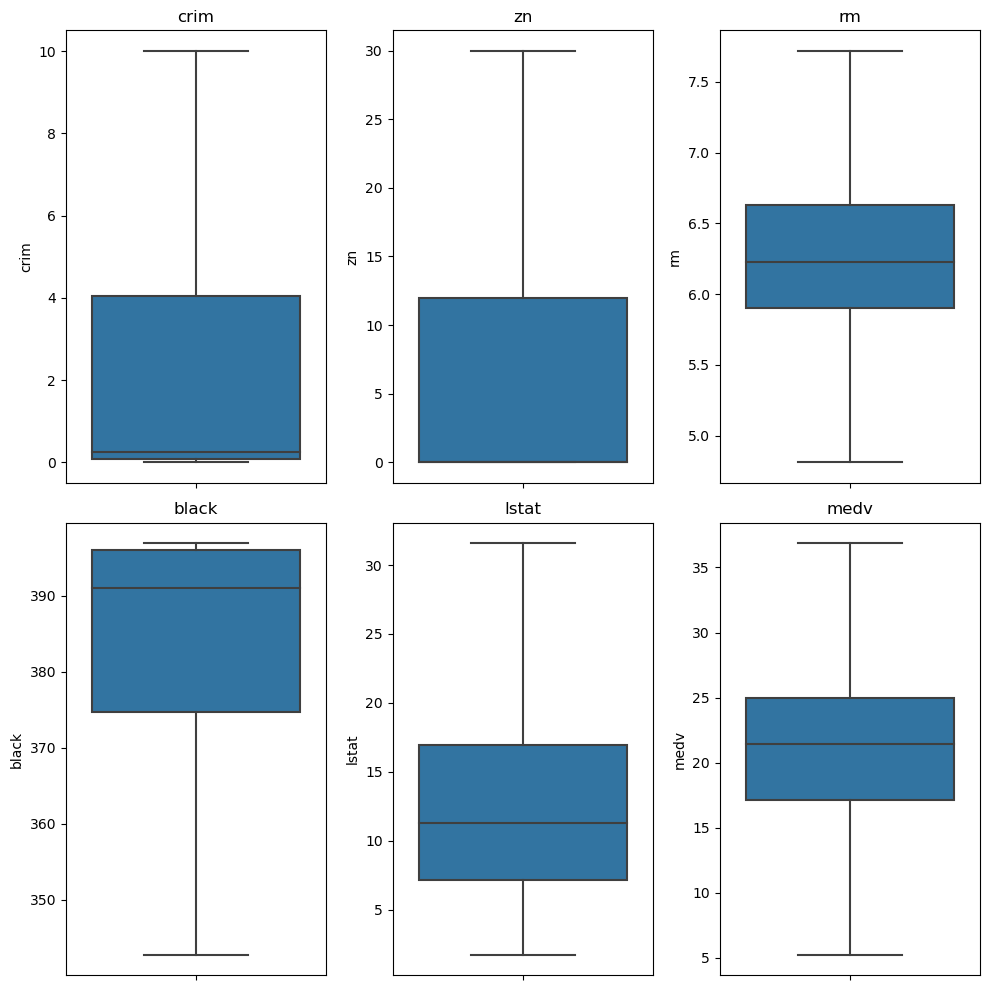

In [4]:
# There are no outliers found in the features 'indus', 'nox', 'age', 'dis', 'rad', 'tax'
# 'chas' since it contains boolean values so no need to find outliers for this feature

# Winsorization is the effective technique to treat outliers
from feature_engine.outliers import Winsorizer

# replace the outliers with maximun and minimum values
winsor_iqr = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, 
                        variables = ['crim', 'zn', 'rm', 'black', 'lstat', 'medv'])
bt_iqr = winsor_iqr.fit_transform(bt)

col_iqr = ['crim', 'zn', 'rm', 'black', 'lstat', 'medv']

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10,10))
ax = ax.flatten()

for i, col in enumerate(col_iqr):
    sns.boxplot( y = bt_iqr[col], ax = ax[i])
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

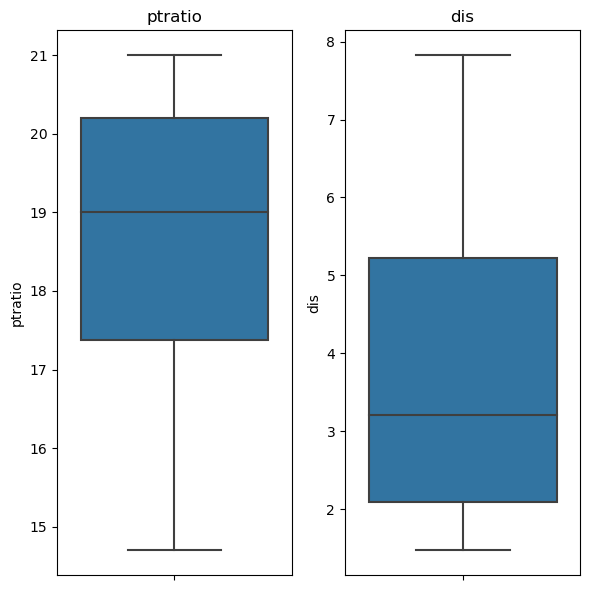

In [5]:
winsor_percentile = Winsorizer(capping_method = 'quantiles', tail = 'both', 
                               fold = 0.05, variables = ['ptratio', 'dis'])
bt_percentile = winsor_percentile.fit_transform(bt)

col_percentile = ['ptratio', 'dis']

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (6,6))
ax = ax.flatten()

for i, col in enumerate(col_percentile):
    sns.boxplot( y = bt_percentile[col], ax = ax[i])
    ax[i].set_title(col)

plt.tight_layout()


2) Discretization Problem statement

In [ ]:
#	Convert the continuous data into discrete classes on the iris dataset. Refer to Iris.csv
# Prepare the dataset by performing the preprocessing techniques, to have the data which improves model performance.
 

In [6]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

iris = pd.read_csv("C:/Users/RamyaRajaLakshmi/Documents/My_Learning/EDA (Exploratory Data Analytics)/Data Preprocessing/InClass_DataPreprocessing_datasets/iris.csv")
iris.dtypes
iris


,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [7]:
# The "Unnamed" identifiers have been removed from the DataFrame since it's indicates the indexing which doesn't provide any useful information. 
iris = iris.drop(iris.columns[iris.columns.str.contains('Unnamed')], axis = 1)
iris['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [8]:
iris.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [9]:
# For each category in the 'Species' column are the same (50 occurrences for each category). In this case, the variance is indeed zero.
# Drop the 'Species' column since it does not provide any useful information for analysis or modeling because it lacks variability
iris = iris.drop('Species', axis = 1)
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [10]:
iris['Sepal.Len_1'] = pd.cut(iris['Sepal.Length'], 
                             bins = [min(iris['Sepal.Length']), iris['Sepal.Length'].median(), max(iris['Sepal.Length'])],
                             include_lowest = True, labels = ['Short', 'Long'])

iris['Sepal.Wid_1'] = pd.cut(iris['Sepal.Width'],
                             bins = [min(iris['Sepal.Width']), iris['Sepal.Width'].median(), max(iris['Sepal.Width'])],
                             include_lowest = True, labels = ['Narrow', 'Wide'])

iris['Petal.Len_1'] = pd.cut(iris['Petal.Length'], 
                             bins = [min(iris['Petal.Length']), iris['Petal.Length'].median(), max(iris['Petal.Length'])],
                             include_lowest = True, labels = ['Short', 'Long'])

iris['Petal.Wid_1'] = pd.cut(iris['Petal.Width'],
                             bins = [min(iris['Petal.Width']), iris['Petal.Width'].median(), max(iris['Petal.Width'])],
                             include_lowest = True, labels = ['Narrow', 'Wide'])
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Sepal.Len_1,Sepal.Wid_1,Petal.Len_1,Petal.Wid_1
0,5.1,3.5,1.4,0.2,Short,Wide,Short,Narrow
1,4.9,3.0,1.4,0.2,Short,Narrow,Short,Narrow
2,4.7,3.2,1.3,0.2,Short,Wide,Short,Narrow
3,4.6,3.1,1.5,0.2,Short,Wide,Short,Narrow
4,5.0,3.6,1.4,0.2,Short,Wide,Short,Narrow
5,5.4,3.9,1.7,0.4,Short,Wide,Short,Narrow
6,4.6,3.4,1.4,0.3,Short,Wide,Short,Narrow
7,5.0,3.4,1.5,0.2,Short,Wide,Short,Narrow
8,4.4,2.9,1.4,0.2,Short,Narrow,Short,Narrow
9,4.9,3.1,1.5,0.1,Short,Wide,Short,Narrow


3) Dummy Variables Problem statement

In [11]:
#	Prepare the dataset by performing the preprocessing techniques, to have all the features in numeric format.
# Refer to the animal_category.csv data set
import pandas as pd
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_csv("C:/Users/RamyaRajaLakshmi/Documents/My_Learning/EDA (Exploratory Data Analytics)/Data Preprocessing/InClass_DataPreprocessing_datasets/Animal_category.csv")
df.columns # provide column names
df.shape # will give the shape of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Index    30 non-null     int64 
 1   Animals  30 non-null     object
 2   Gender   30 non-null     object
 3   Homly    30 non-null     object
 4   Types    30 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.3+ KB


In [12]:
# 'Index' column in the dataset serves as an index or identifier for the records and does not provide any meaningful information for analysis, 
# It is not necessary to include it as a feature in analysis
df = df.drop('Index', axis = 1)

# Perform label encoding for 'Animals', 'Types' columns
label_encoder = LabelEncoder()
df[['Animals', 'Types']] = df[['Animals', 'Types']].apply(label_encoder.fit_transform)
df

,Animals,Gender,Homly,Types
0,0,Male,Yes,0
1,1,Male,Yes,1
2,4,Male,Yes,2
3,4,Male,Yes,2
4,1,Female,Yes,0
5,0,Female,Yes,1
6,3,Female,Yes,3
7,2,Female,Yes,4
8,0,Female,Yes,0
9,1,Male,Yes,1


In [13]:
# Perform one-hot encoding for the 'Homly', 'Gender' feature
df = pd.get_dummies(df, columns = ['Homly', 'Gender'], drop_first = True)
print("Encoded DataFrame: \n", df)

Encoded DataFrame: 
     Animals  Types  Homly_Yes  Gender_Male
0         0      0          1            1
1         1      1          1            1
2         4      2          1            1
3         4      2          1            1
4         1      0          1            0
5         0      1          1            0
6         3      3          1            0
7         2      4          1            0
8         0      0          1            0
9         1      1          1            1
10        1      1          1            1
11        3      3          0            1
12        3      3          0            1
13        3      3          0            1
14        0      0          1            0
15        3      3          0            0
16        3      3          0            0
17        0      0          1            0
18        2      4          0            1
19        2      4          0            0
20        2      4          0            1
21        2      4          0    

4) Duplication_Typecasting-Problem statement 

Q1) For the given dataset perform the type casting (convert the datatypes, ex. float to int)
Q2) Check for duplicate values, and handle the duplicate values (ex. drop)
Q3) Do the data analysis (EDA)?


In [14]:
# Refer OnlineRetail.csv dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

retail = pd.read_csv("C:/Users/RamyaRajaLakshmi/Documents/My_Learning/EDA (Exploratory Data Analytics)/Data Preprocessing/InClass_DataPreprocessing_datasets/Online Retail.csv", encoding = 'latin1')
retail.dtypes
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [15]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [16]:
duplicate = retail.duplicated()  # Returns Boolean Series denoting duplicate rows
sum(duplicate)

5268

In [17]:
retail = retail.drop_duplicates(keep = 'last')
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [18]:
# Unable to convert the datatype since CustomerID & Description features contains NA value, using imputation methods filling the values
from feature_engine.imputation import RandomSampleImputer
random_imp = RandomSampleImputer()
retail[['CustomerID', 'Description']] = pd.DataFrame(random_imp.fit_transform(retail[['CustomerID', 'Description']]))
retail.isna().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
retail[['CustomerID']] = retail[['CustomerID']].astype(int)
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object

(array([2.00000e+00, 5.36629e+05, 9.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-11062.06 ,  -1055.648,   8950.764,  18957.176,  28963.588,
         38970.   ]),
 <BarContainer object of 5 artists>)

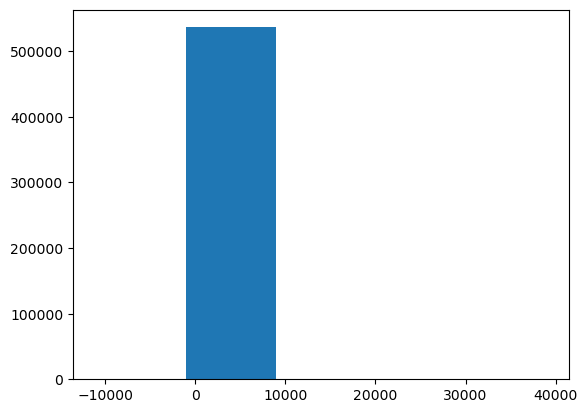

In [20]:
plt.hist(retail['UnitPrice'], bins = 5)

{'whiskers': [<matplotlib.lines.Line2D at 0x22b61ffa470>,
 'caps': [<matplotlib.lines.Line2D at 0x22b61ffa890>,
 'boxes': [<matplotlib.lines.Line2D at 0x22b61ffa1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x22b61ffadd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22b61ffb070>],
 'means': []}

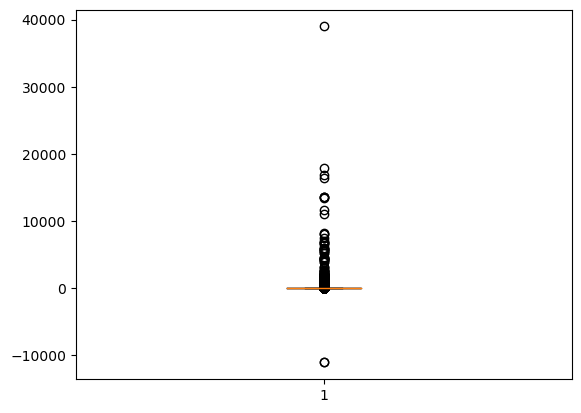

In [21]:
plt.boxplot(retail['UnitPrice'])

5) MissingValues - Imputation

In [22]:
# Prepare the common techniques are either removing those records completely or substitute those missing values with the logical ones, there are various techniques to treat these types of problems.
# Refer to the file Claimants.csv

import pandas as pd 
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

claimants = pd.read_csv("C:/Users/RamyaRajaLakshmi/Documents/My_Learning/EDA (Exploratory Data Analytics)/Data Preprocessing/InClass_DataPreprocessing_datasets/claimants.csv")
claimants.dtypes

CASENUM       int64
ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [23]:
claimants

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350


In [24]:
# Check for count of NA's in each column
claimants.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [25]:
from feature_engine.imputation import RandomSampleImputer

random_imputer = RandomSampleImputer()
claimants['CLMAGE'] = pd.DataFrame(random_imputer.fit_transform(claimants[['CLMAGE']]))
claimants['CLMAGE'].isnull().sum()
#replacing the 0 values with median value
claimants['CLMAGE'].replace(0, np.nan, inplace = True)
median = claimants['CLMAGE'].median()
claimants['CLMAGE'].fillna(median, inplace = True)

claimants

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,13.0,0.350


In [26]:
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
claimants['CLMSEX'] = pd.DataFrame(mode_imputer.fit_transform(claimants[['CLMSEX']]))
claimants['CLMINSUR'] = pd.DataFrame(mode_imputer.fit_transform(claimants[['CLMINSUR']]))
claimants['SEATBELT'].fillna(claimants['SEATBELT'].mode().iloc[0], inplace = True)

claimants

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,13.0,0.350


In [27]:
claimants.isnull().sum()

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [28]:
claimants[['CLMAGE', 'CLMSEX', 'CLMINSUR', 'SEATBELT']] = claimants[['CLMAGE', 'CLMSEX', 'CLMINSUR', 'SEATBELT']].astype('int64')
claimants.dtypes

CASENUM       int64
ATTORNEY      int64
CLMSEX        int64
CLMINSUR      int64
SEATBELT      int64
CLMAGE        int64
LOSS        float64
dtype: object

6) Standardization & Normalization

In [29]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

seeds_data = pd.read_csv("C:/Users/RamyaRajaLakshmi/Documents/My_Learning/EDA (Exploratory Data Analytics)/Data Preprocessing/InClass_DataPreprocessing_datasets/Seeds_data.csv")
seeds_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             210 non-null    float64
 1   Perimeter        210 non-null    float64
 2   Compactness      210 non-null    float64
 3   length           210 non-null    float64
 4   Width            210 non-null    float64
 5   Assymetry_coeff  210 non-null    float64
 6   len_ker_grove    210 non-null    float64
 7   Type             210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [30]:
s = seeds_data.describe()
s

,Area,Perimeter,Compactness,length,Width,Assymetry_coeff,len_ker_grove,Type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.259081,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377088,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [31]:
seeds_data.Type.value_counts()

1    70
2    70
3    70
Name: Type, dtype: int64

In [32]:
# For each category in the 'Type' column are the same (70 occurrences for each category). In this case, the variance is indeed zero.
# The column does not provide any useful information for analysis or modeling because it lacks variability
seeds_data = seeds_data.drop(['Type'], axis = 1)

In [33]:
from sklearn.preprocessing import StandardScaler
# To scale data
std_scaler = StandardScaler()
s_new = std_scaler.fit_transform(seeds_data)
# Convert the array back to a dataframe
data = pd.DataFrame(s_new)
# print the pre-processed Dataframe 
print(data)

            0         1         2         3         4         5         6
0    0.142098  0.215462  0.000061  0.304218  0.140671 -0.986152 -0.383577
1    0.011188  0.008224  0.428515 -0.168625  0.196494 -1.788166 -0.922013
2   -0.192067 -0.360201  1.442383 -0.763637  0.207127 -0.667479 -1.189192
3   -0.347091 -0.475333  1.039381 -0.688978  0.318773 -0.960818 -1.229983
4    0.445257  0.330595  1.374509  0.066666  0.805230 -1.563495 -0.475356
5   -0.161062 -0.268094  1.022413 -0.548709  0.140671 -0.825482 -0.922013
6   -0.054267 -0.053180  0.377610 -0.148263 -0.000215 -0.076135 -0.385617
7   -0.254076 -0.352525  0.852728 -0.471787  0.114089 -0.666813 -0.832274
8    0.614062  0.691344  0.157019  0.960316  0.547381 -1.106821  0.956394
9    0.548607  0.530158  0.721222  0.577969  0.653711 -1.154155  0.254796
10   0.142098  0.223138 -0.059329  0.193360 -0.045405  0.561876 -0.191862
11  -0.281636 -0.306472  0.364883 -0.431064 -0.154393 -1.322158 -0.830235
12  -0.329866 -0.413929  0.721222 -0.4

In [34]:
result = data.describe()
result

,0,1,2,3,4,5,6
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,-3.383537e-16,1.184238e-16,1.285744e-15,-2.097793e-15,1.319579e-15,-3.383537e-16,-8.987520e-17
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.672245e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.375592e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.869636e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.045655e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.057259e+00,3.170590e+00,2.328998e+00


7) Zero Variance - Problem statement 

In [35]:
# Find which columns of the given dataset with zero variance, and explore various techniques used to remove the zero variance from the dataset to perform certain analysis.
# Refer Z_dataset.csv dataset

import pandas as pd
df_z = pd.read_csv("C:/Users/RamyaRajaLakshmi/Documents/My_Learning/EDA (Exploratory Data Analytics)/Data Preprocessing/InClass_DataPreprocessing_datasets/Z_dataset.csv")

df_z.dtypes

Id                  int64
square.length     float64
square.breadth    float64
rec.Length        float64
rec.breadth       float64
colour             object
dtype: object

In [36]:
# 'Id' column in the dataset serves as an index or identifier for the records and does not provide any meaningful information for analysis, 
# It is not necessary to include it as a feature in analysis

df_z['colour'].value_counts()

Blue      50
Green     50
Orange    50
Name: colour, dtype: int64

In [37]:
# Variance is a measure of variability, and if all values are the same, there is no variability, resulting in a variance of zero
# For each category in the 'colour' column are the same (50 occurrences for each category). In this case, the variance is indeed zero.
# The column does not provide any useful information for analysis or modeling because it lacks variability

df_z = df_z.drop(['colour', 'Id'], axis = 1)

In [38]:
df_z[['square.length', 'square.breadth', 'rec.Length', 'rec.breadth']].var()
# The columns 'square.length', 'square.breadth', 'rec.Length', 'rec.breadth' have high variance and they are valuable for analysis, it is indeed not recommended to remove them from the dataset.
# High variance indicates that these columns exhibit significant variability in their values, which can provide important information for further analysis or modeling tasks.
# so we can retain these columns in dataset as they contain meaningful and informative features.

square.length     0.685694
square.breadth    0.189979
rec.Length        3.116278
rec.breadth       0.581006
dtype: float64

8) Transformations Problem statement

In [39]:
# Explore various techniques to transform the data for better model performance.
# Refer to the calories_consumed.csv dataset 


In [40]:
import pandas as pd
import scipy.stats as stats 
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_csv("C:/Users/RamyaRajaLakshmi/Documents/My_Learning/EDA (Exploratory Data Analytics)/Data Preprocessing/InClass_DataPreprocessing_datasets/calories_consumed.csv")
df.dtypes

Weight gained (grams)    int64
Calories Consumed        int64
dtype: object

In [41]:
df.isna().sum()

Weight gained (grams)    0
Calories Consumed        0
dtype: int64

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([1400, 1500, 1600, 1670, 1900, 1900, 2200, 2300, 2500, 2700, 2800,
         3000, 3400, 3900], dtype=int64)),
 (786.2835439789025, 2340.714285714286, 0.9770434301718469))

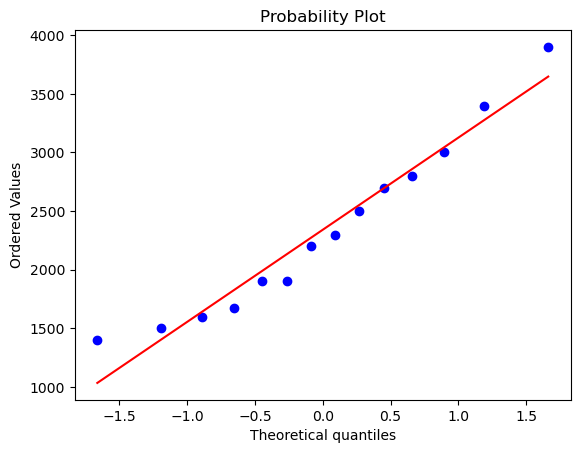

In [42]:
stats.probplot(df['Calories Consumed'], dist = stats.norm, plot = pylab)

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([7.24422752, 7.31322039, 7.37775891, 7.42057891, 7.54960917,
         7.54960917, 7.69621264, 7.7406644 , 7.82404601, 7.90100705,
         7.9373747 , 8.00636757, 8.13153071, 8.26873183])),
 (0.33540542717569266, 7.711495639806377, 0.9912678803533991))

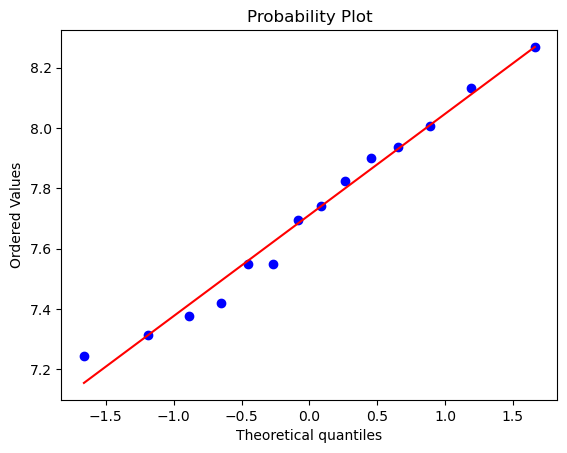

In [43]:
stats.probplot(np.log(df['Calories Consumed']), dist = stats.norm, plot = pylab)

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([3.12873839, 3.13795083, 3.14641133, 3.1519422 , 3.16821896,
         3.16821896, 3.18602298, 3.1912806 , 3.20097046, 3.20971844,
         3.21378804, 3.2213971 , 3.23483644, 3.24904442])),
 (0.03964955394492225, 3.1863242258570343, 0.9918538853119074))

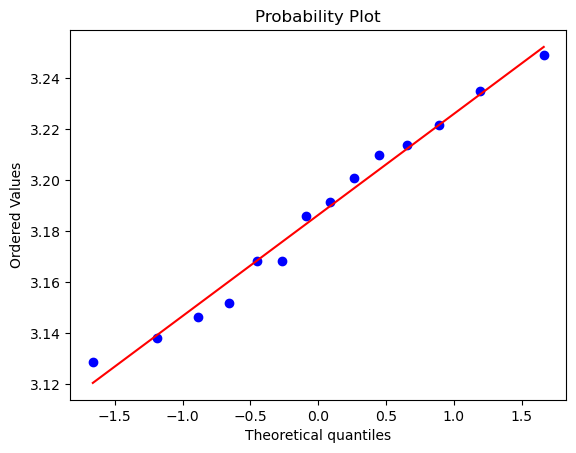

In [44]:
from feature_engine import transformation
tf = transformation.YeoJohnsonTransformer(variables = 'Calories Consumed')
df_tf = tf.fit_transform(df)
stats.probplot(df_tf['Calories Consumed'], dist = stats.norm, plot = pylab)


((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([  62,  100,  108,  110,  128,  150,  200,  200,  300,  350,  600,
          700,  900, 1100], dtype=int64)),
 (322.66332324031407, 357.7142857142857, 0.9036888266584125))

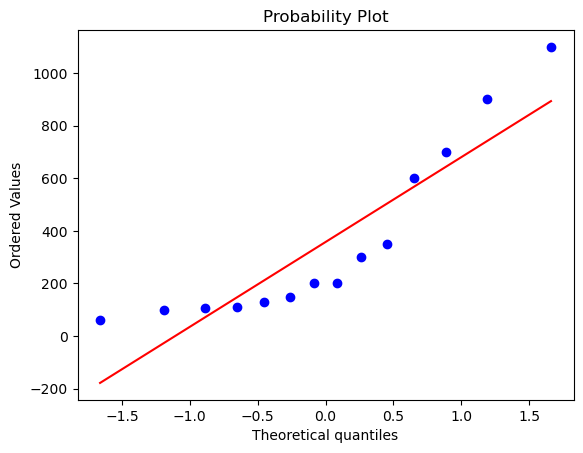

In [45]:
stats.probplot(df['Weight gained (grams)'], dist = stats.norm, plot = pylab)


((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([2.64741857, 2.81973162, 2.84571702, 2.85184376, 2.90145333,
         2.95152376, 3.03773713, 3.03773713, 3.14981057, 3.18970773,
         3.31842978, 3.35235754, 3.40511444, 3.44506974])),
 (0.2607285036516299, 3.0681180087504054, 0.9830674104023834))

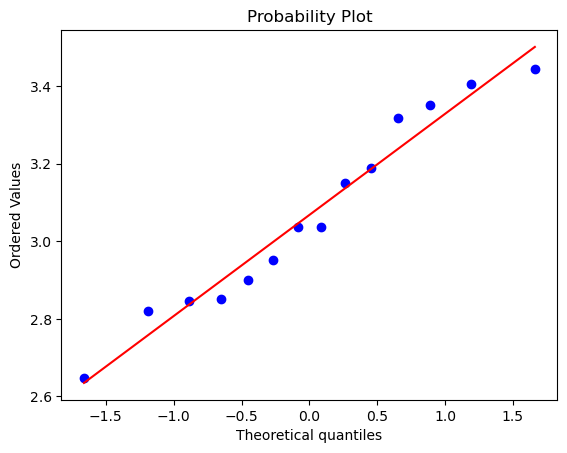

In [46]:
fitted_data, fitted_lambda = stats.boxcox(df['Weight gained (grams)'])
# the code performs the Box-Cox transformation on the education.workex data, 
#saves the lambda value, and then plots the original data and the transformed data side by side using kernel density estimation (KDE) plots.
stats.probplot(fitted_data, dist = stats.norm, plot = pylab)

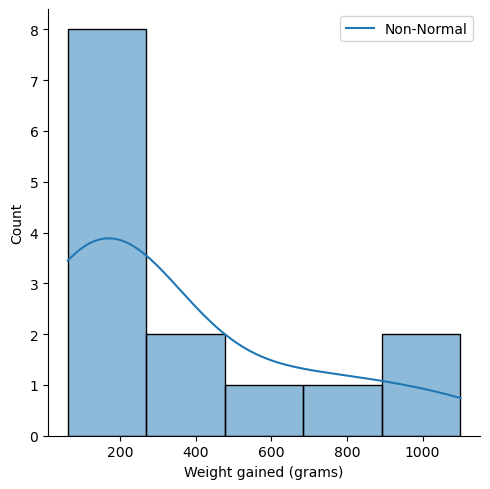

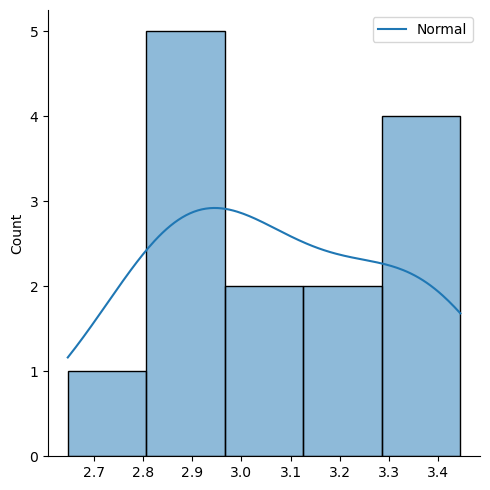

In [47]:
#df['Weight gained (grams)'] = df['Weight gained (grams)'].astype('float')#
#valid_data = df['Weight gained (grams)'].dropna().astype(float)
sns.displot(df['Weight gained (grams)'], fill = True, kde = True, label = "Non-Normal", legend = True)
plt.legend(labels=["Non-Normal"])
sns.displot(fitted_data, fill = True, kde = True, label = "Normal", legend = True)  
plt.legend(labels=["Normal"])
plt.tight_layout()
plt.show()

9) String Manipulations

In [48]:
# 1.	Create a string “Grow Gratitude”. Code for the following tasks:

word = "Grow Gratitude"

# a)	How do you access the letter “G” of “Growth”?

print(word[0])

# b)	How do you find the length of the string?

print(len(word))

# c)	Count how many times “G” is in the string?

print(word.count('G'))

G
14
2


In [49]:
# 2.	Create a string “Being aware of a single shortcoming within yourself is far more useful than being aware of a thousand in someone else.”Code for the following:

string = "Being aware of a single shortcoming within yourself is far more useful than being aware of a thousand in someone else."

# a)	Count the number of characters in the string.

count = 0
for char in string:
    count+=1
print(count)

118


In [50]:
# 3.	Create a string "Idealistic as it may sound, altruism should be the driving force in business, not just competition and a desire for wealth"
# Code for the following tasks:

s = "Idealistic as it may sound, altruism should be the driving force in business, not just competition and a desire for wealth"

# a)	get one char of the word

word = s.split()[5]
print(word[5])

# b)	get the first three char

print(s[:3])

# c)	get the last three char

print(s[-3:])

i
Ide
lth


In [51]:
# 4.	create a string "stay positive and optimistic". Now write a code to split on whitespace.

w = "stay positive and optimistic"
split = w.split()
output = "".join(split)
print(output)


staypositiveandoptimistic


In [52]:
# Write a code to find if:
# a)	The string starts with “H”
# b)	The string ends with “d”
# c)	The string ends with “c”

w = "stay positive and optimistic"
words = w.split()
char_1 = "H"
char_2 = "d"
char_3 = "c"
for i in words:
    if i.startswith(char_1):
        print(i)
    if i.endswith(char_2) or i.endswith(char_3):
        print(i)


and
optimistic


In [53]:
# 5.	Write a code to print " 🪐 " one hundred and eight times.

symbol = "\U0001FA90"
code_point = ord(symbol)
s = chr(code_point)
print(s * 108)

🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐


In [54]:
# 6.	Create a string “Grow Gratitude” and write a code to replace “Grow” with “Growth of”

string = "Grow Gratitude"
str_new = string.replace("Grow", "Growth of")
print(str_new)


Growth of Gratitude


In [55]:
# 7.	A story was printed in a pdf, which isn’t making any sense. i.e.:
# “.elgnujehtotniffo deps mehtfohtoB .eerfnoilehttesotseporeht no dewangdnanar eh ,ylkciuQ .elbuortninoilehtdecitondnatsapdeklawesuomeht ,nooS .repmihwotdetratsdnatuotegotgnilggurts saw noilehT .eert a tsniagapumihdeityehT .mehthtiwnoilehtkootdnatserofehtotniemacsretnuhwef a ,yad enO .ogmihteldnaecnedifnocs’esuomeht ta dehgualnoilehT ”.emevasuoy fi yademosuoyotplehtaergfo eb lliw I ,uoyesimorp I“ .eerfmihtesotnoilehtdetseuqeryletarepsedesuomehtnehwesuomehttaeottuoba saw eH .yrgnaetiuqpuekow eh dna ,peels s’noilehtdebrutsidsihT .nufroftsujydobsihnwoddnapugninnurdetratsesuom a nehwelgnujehtnignipeelsecno saw noil A”
# You have noticed that the story is printed in a reversed order. Rectify the same and write a code to print the same story in the correct order.

sentence = ".elgnuj eht otni ffo deps meht fo htoB .eerf noil eht tes ot sepor eht no dewang dna nar eh ,ylkciuQ .elbuort ni noil eht deciton dna tsap deklaw esuom eht ,nooS .repmihw ot detrats dna tuo teg ot gnilggurts saw noil ehT .eert a tsniaga pu mih deit yehT .meht htiw noil eht koot dna tserof eht ot ni emac sretnuh wef a ,yad enO .og mih tel dna ecnedifnoc s’esuom eht ta dehgual noil ehT ”.em evas uoy fi yademos uoy ot pleh taerg fo eb lliw I ,uoy esimorp I“ .eerf mih tes ot noil eht detseuqer yletarepsed esuom eht nehw esuom eht tae ot tuoba saw eH .yrgna etiuq puekow eh dna ,peels s’noil eht debrutsid sihT .nuf rof tsuj ydob sih nwod dna pu gninnur detrats esuom a nehw elgnuj eht ni gnipeels ecno saw noil A"
reversed_sentence = sentence[::-1]
print(reversed_sentence)

A lion was once sleeping in the jungle when a mouse started running up and down his body just for fun. This disturbed the lion’s sleep, and he wokeup quite angry. He was about to eat the mouse when the mouse desperately requested the lion to set him free. “I promise you, I will be of great help to you someday if you save me.” The lion laughed at the mouse’s confidence and let him go. One day, a few hunters came in to the forest and took the lion with them. They tied him up against a tree. The lion was struggling to get out and started to whimper. Soon, the mouse walked past and noticed the lion in trouble. Quickly, he ran and gnawed on the ropes to set the lion free. Both of them sped off into the jungle.
